In [26]:
import cv2
import os
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [27]:
#Dataset path
dataset_path ="/Users/michel/Downloads"

#import the dataset

file_path = os.path.join(dataset_path, "Epileptic Seizure Recognition.csv")

In [28]:
#define dataframe
data = pd.read_csv(file_path)

#show the first 5 rows
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [29]:
#remove columns that are "Unamed"
data.drop('Unnamed', axis=1, inplace=True)

#classrelabelling
class_relabel = {2:0, 3:0, 4:0, 5:0}
data.replace({"y": class_relabel}, inplace=True)    

In [30]:
X = data.drop('y', axis=1)
y = data['y']

In [31]:
#overview of the dataset eg distribution of classes
count = data ['y'].value_counts()

# Check if the keys exist in the series
epileptic_seizure_count = count[1] if 1 in count else 0
non_epileptic_seizure_count = count[0] if 0 in count else 0

print(f"number of records epileptic seizure: {epileptic_seizure_count} vs non-epileptic seizure: {non_epileptic_seizure_count}")

number of records epileptic seizure: 2300 vs non-epileptic seizure: 9200


In [32]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [33]:
# Create train, validation, and test set
train, temp = train_test_split(data, test_size=0.3, random_state=42, stratify=data['y'])
test, validation = train_test_split(temp, test_size=1/3, random_state=42, stratify=temp['y'])


# Calculate the total number of samples
total_samples = data.shape[0]

# Print out the distribution of the data
print(f"Training set: {train.shape[0]/total_samples*100:.2f}% of the original dataset")
print(f"Validation set: {validation.shape[0]/total_samples*100:.2f}% of the original dataset")
print(f"Test set: {test.shape[0]/total_samples*100:.2f}% of the original dataset")


Training set: 70.00% of the original dataset
Validation set: 10.00% of the original dataset
Test set: 20.00% of the original dataset


In [34]:
#save the dataframes to csv
train.to_csv('train_eeg.csv', index=False) 
validation.to_csv('validation_eeg.csv', index=False)
test.to_csv('test_eeg.csv', index=False)


In [35]:
# Assuming 'y' is the name of your label column
X_train = train.drop('y', axis=1)
y_train = train['y']

X_validation = validation.drop('y', axis=1)
y_validation = validation['y']

X_test = test.drop('y', axis=1)
y_test = test['y']

# Now you can check the unique classes in your test set
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

# Check unique classes in training set
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)

# Check unique classes in validation set
unique_classes_validation = np.unique(y_validation)
print("Unique classes in y_validation:", unique_classes_validation)

Unique classes in y_test: [0 1]
Unique classes in y_train: [0 1]
Unique classes in y_validation: [0 1]


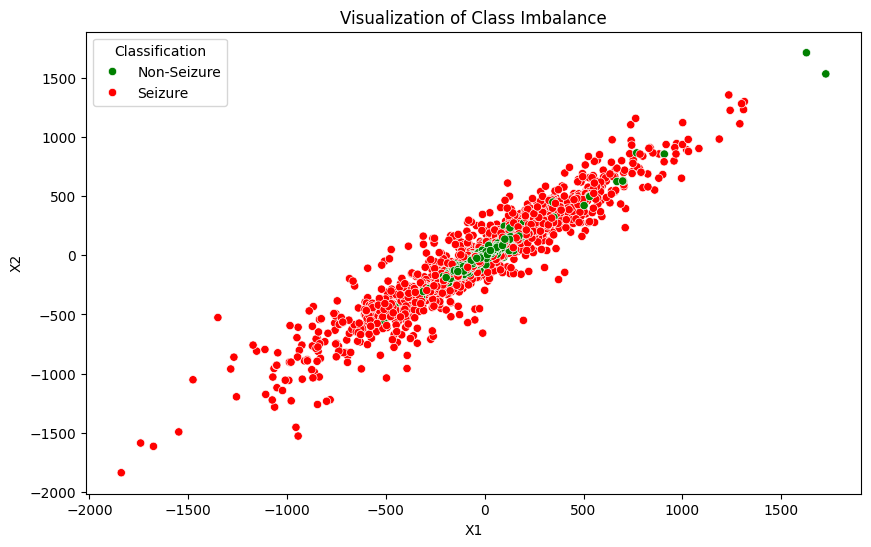

/var/folders/cg/1qhqv03x7r5_bpw0vj_0frj80000gn/T/ipykernel_65478/439282930.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classification', data=data, palette=['green', 'red'])


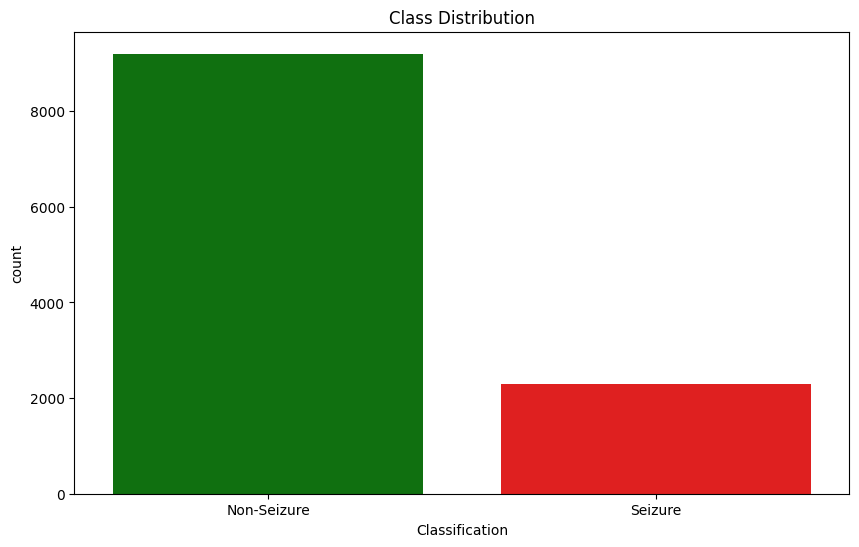

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import pandas as pd

#Dataset path
dataset_path ="/Users/michel/Downloads"

file_path = os.path.join(dataset_path, "Epileptic Seizure Recognition.csv")
data = pd.read_csv(file_path)
df = data


# Create a new binary target variable
data['seizure'] = data['y'].apply(lambda x: 1 if x == 1 else 0)

# Map the values
data['seizure'] = data['seizure'].map({0: 'Non-Seizure', 1: 'Seizure'})

# Rename the column
data = data.rename(columns={'seizure': 'Classification'})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X2', hue='Classification', data=data, palette=['green', 'red'])
plt.title('Visualization of Class Imbalance')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.countplot(x='Classification', data=data, palette=['green', 'red'])
plt.title('Class Distribution')
plt.show()

